In [157]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import math 
import seaborn as sns

In [158]:
car_df = pd.read_csv('data/cars.csv')

In [159]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [160]:
car_df['car_name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [161]:
car_df.rename(columns={'model':'year'}, inplace=True)

In [162]:
car_df['car_name'][1]

'buick skylark 320'

In [163]:
car_df['make'] = car_df['car_name'].str.split().str[0]
car_df['model'] = car_df['car_name'].str.split().str[1:].str.join(' ')
car_df.drop('car_name', axis=1, inplace=True)

In [164]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick,skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth,satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc,rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford,torino


In [165]:
car_df[car_df['horsepower'] == '?'].count()

mpg             6
cylinders       6
displacement    6
horsepower      6
weight          6
acceleration    6
year            6
origin          6
make            6
model           6
dtype: int64

In [166]:
car_df['horsepower'].replace('?', 0, inplace=True)

In [167]:
car_df['horsepower'] = car_df['horsepower'].astype(float)

In [168]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   make          398 non-null    object 
 9   model         398 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB


In [169]:
car_df["year"]

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: year, Length: 398, dtype: int64

In [170]:
car_df["year groups"] = pd.cut(car_df["year"], [70, 73, 76, 79, 83], include_lowest=True, right=False, labels=["70-72", "73-75", "76-78", "79-82"])



In [171]:
car_df["year groups"].isna().count()

398

In [172]:
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make,model,year groups
369,34.0,4,112.0,88.0,2395.0,18.0,82,1,chevrolet,cavalier 2-door,79-82
295,35.7,4,98.0,80.0,1915.0,14.4,79,1,dodge,colt hatchback custom,79-82
371,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge,aries se,79-82
289,16.9,8,350.0,155.0,4360.0,14.9,79,1,buick,estate wagon (sw),79-82
312,37.2,4,86.0,65.0,2019.0,16.4,80,3,datsun,310,79-82
340,25.8,4,156.0,92.0,2620.0,14.4,81,1,dodge,aries wagon (sw),79-82
228,18.5,6,250.0,98.0,3525.0,19.0,77,1,ford,granada,76-78
215,13.0,8,318.0,150.0,3755.0,14.0,76,1,dodge,d100,76-78
62,13.0,8,350.0,165.0,4274.0,12.0,72,1,chevrolet,impala,70-72
322,46.6,4,86.0,65.0,2110.0,17.9,80,3,mazda,glc,79-82


In [173]:
car_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


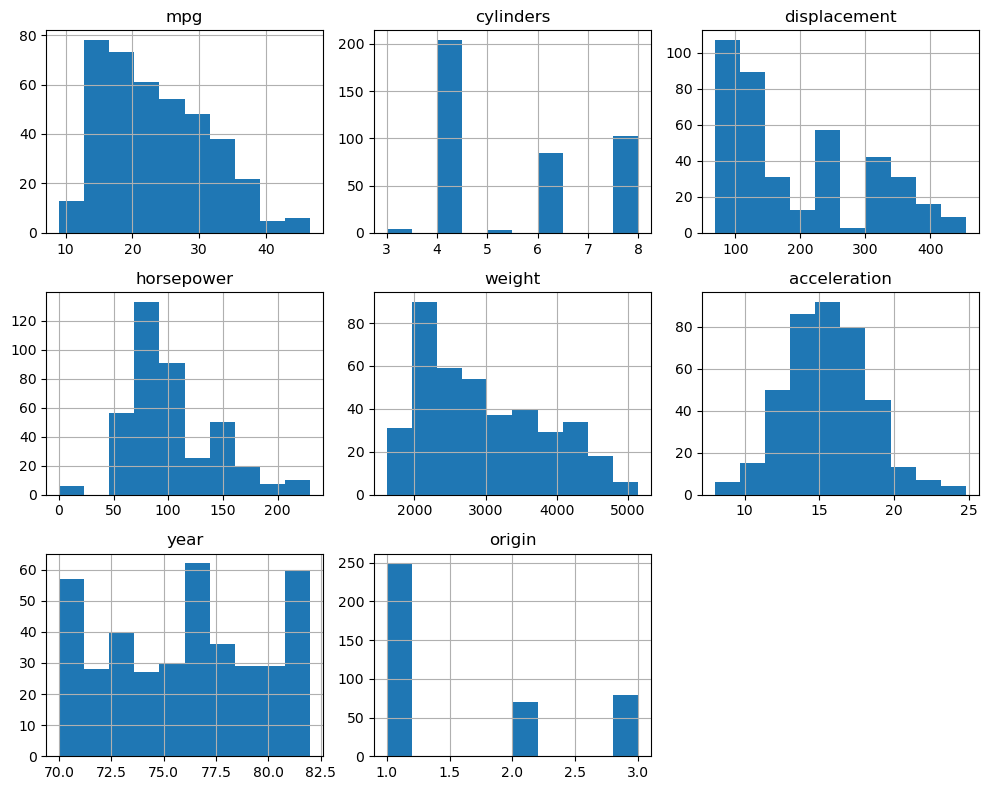

In [174]:
car_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [175]:
mpg_per_year = car_df.groupby('year')['mpg'].mean()

print(mpg_per_year)


year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64


In [176]:
# def calculate_mean(df, column1, column2):
#     mpg_per_year = car_df.groupby('year')['mpg'].mean()
#     return mpg_per_year

# calculate_mean(car_df,"year", "mpg")

In [186]:
#Got the means of mpg per year group "70-72", "73-75", "76-78", "79-82"
mean_70_72 = np.mean(car_df[car_df["year groups"] == "70-72"]["mpg"])
mean_73_75 = np.mean(car_df[car_df["year groups"] == "73-75"]["mpg"])
mean_76_78 = np.mean(car_df[car_df["year groups"] == "76-78"]["mpg"])
mean_79_82 = np.mean(car_df[car_df["year groups"] == "79-82"]["mpg"])

print(mean_70_72)

19.2


In [188]:
#Created Dataframes
y_70_72_df = car_df[car_df["year groups"] == "70-72"]
y_73_75_df = car_df[car_df["year groups"] == "73-75"]
y_76_78_df = car_df[car_df["year groups"] == "76-78"]
y_79_82_df= car_df[car_df["year groups"] == "79-82"]

print(y_76_78_df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
182  28.0          4         107.0        86.0  2464.0          15.5  76.0   
183  25.0          4         116.0        81.0  2220.0          16.9  76.0   
184  25.0          4         140.0        92.0  2572.0          14.9  76.0   
185  26.0          4          98.0        79.0  2255.0          17.7  76.0   
186  27.0          4         101.0        83.0  2202.0          15.3  76.0   
..    ...        ...           ...         ...     ...           ...   ...   
275  17.0          6         163.0       125.0  3140.0          13.6  78.0   
276  21.6          4         121.0       115.0  2795.0          15.7  78.0   
277  16.2          6         163.0       133.0  3410.0          15.8  78.0   
278  31.5          4          89.0        71.0  1990.0          14.9  78.0   
279  29.5          4          98.0        68.0  2135.0          16.6  78.0   

     origin        make      model year groups  
182       2   

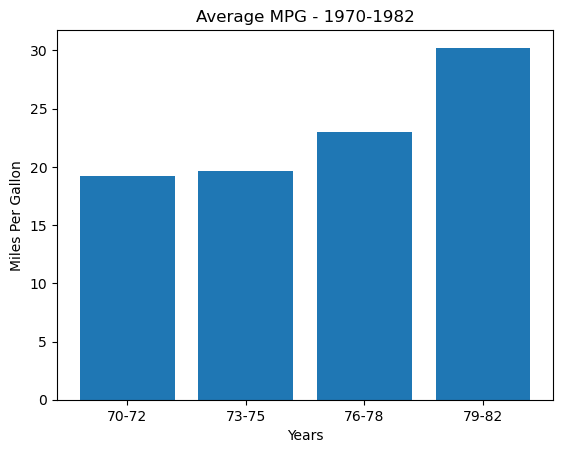

In [206]:
year_groups = ["70-72", "73-75", "76-78", "79-82"]

plt.bar(year_groups, [mean_70_72, mean_73_75, mean_76_78, mean_79_82])

plt.xlabel("Years")
plt.ylabel("Miles Per Gallon")
plt.title("Average MPG - 1970-1982")


plt.show()